In [20]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [21]:
df = pd.read_csv('car_data.csv')

In [22]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]

In [23]:
y= df['class_value']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [243]:
Car = RandomForestClassifier(n_estimators=7,random_state=0)

In [244]:
Car

RandomForestClassifier(n_estimators=7, random_state=0)

In [245]:
Car = Car.fit(X_train, y_train)

In [246]:
y_pred = Car.predict(X_test)

In [247]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision(Hassasiyet):", precision)
print("Recall (Duyarlılık):", recall)
print("F1 Skoru:", f1)


Precision(Hassasiyet): 0.9600324355973332
Recall (Duyarlılık): 0.9566473988439307
F1 Skoru: 0.9568868428455162


In [50]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz-10.0.1-win64/bin/'
#graphviz kütüphanesini manuel olarak tanımlamamız gerekiyordu.

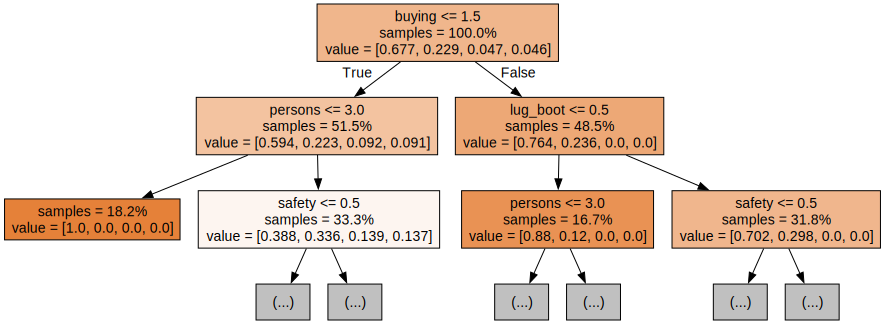

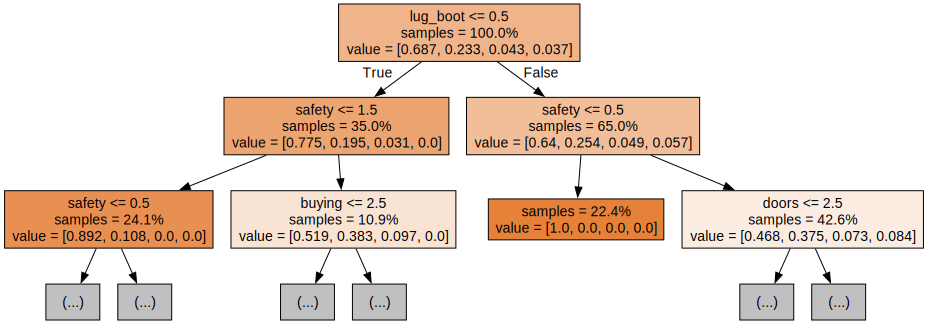

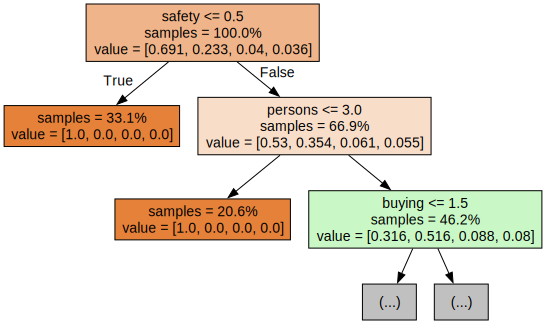

In [55]:
for i in range(3):
    tree = Car.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)